# **Task 1**
---



In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL for each page
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse the content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extract reviews
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

# Create DataFrame
df = pd.DataFrame({'reviews': reviews})

# Save DataFrame to CSV
df.to_csv("BA_reviews.csv", index=False)

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [4]:
df

NameError: name 'df' is not defined

In [ ]:
df['reviews'] = df['reviews'].str.split('\|', expand=True)[1]


In [5]:
df

NameError: name 'df' is not defined

**Rule-based approach:**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# **Step 1: Cleaning the text**

In [6]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

NameError: name 'df' is not defined

# **Step 2: Tokenization**
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# **Step 3: Enrichment – POS tagging**
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# **Step 4: Stopwords removal**
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# **Step 5: Obtaining the stem words**
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ameyakulkarni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ameyakulkarni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ameyakulkarni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ameyakulkarni/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ameyakulkarni/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport be...,"[(chose, v), (Rotterdam, n), (London, n), (Cit..."
1,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,"[(entire, a), (booking, n), (ticketing, v), (e..."
2,British Airways cancelled my flight less th...,British Airways cancelled my flight less than...,"[(British, a), (Airways, n), (cancelled, v), (..."
3,I wanted to write this review so I could give...,I wanted to write this review so I could give...,"[(wanted, v), (write, v), (review, n), (could,..."
4,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport be...,"[(chose, v), (Rotterdam, n), (London, n), (Cit...",choose Rotterdam London City airport conveni...
1,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,"[(entire, a), (booking, n), (ticketing, v), (e...",entire booking ticket experience stressful e...
2,British Airways cancelled my flight less th...,British Airways cancelled my flight less than...,"[(British, a), (Airways, n), (cancelled, v), (...",British Airways cancel flight less hour Auto...
3,I wanted to write this review so I could give...,I wanted to write this review so I could give...,"[(wanted, v), (write, v), (review, n), (could,...",want write review could give huge thank one ...
4,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi...",Check fast friendly Security breeze Lounge b...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,We chose Rotterdam and London City airport b...,choose Rotterdam London City airport conveni...
1,The entire booking and ticketing experience h...,entire booking ticket experience stressful e...
2,British Airways cancelled my flight less th...,British Airways cancel flight less hour Auto...
3,I wanted to write this review so I could give...,want write review could give huge thank one ...
4,Check in fast and friendly. Security a breez...,Check fast friendly Security breeze Lounge b...
...,...,...
995,London to Seattle. My seat was on the upper ...,London Seattle seat upper deck nice perk Sea...
996,London to Gibraltar. Check in at T3 was fine...,London Gibraltar Check fine lounge good staf...
997,London to Boston. BA replaced A380 with a ve...,London Boston BA replace old Boeing Video sy...
998,London to Doha. Similar to our outbound flig...,London Doha Similar outbound flight seat com...


## **Sentiment Analysis using VADER**
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport be...,"[(chose, v), (Rotterdam, n), (London, n), (Cit...",choose Rotterdam London City airport conveni...,0.1531,Neutral
1,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,"[(entire, a), (booking, n), (ticketing, v), (e...",entire booking ticket experience stressful e...,-0.9482,Negative
2,British Airways cancelled my flight less th...,British Airways cancelled my flight less than...,"[(British, a), (Airways, n), (cancelled, v), (...",British Airways cancel flight less hour Auto...,-0.7650,Negative
3,I wanted to write this review so I could give...,I wanted to write this review so I could give...,"[(wanted, v), (write, v), (review, n), (could,...",want write review could give huge thank one ...,0.9722,Positive
4,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi...",Check fast friendly Security breeze Lounge b...,0.9717,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    480
Negative    412
Neutral     108
Name: count, dtype: int64

# **Visual Representation**

([<matplotlib.patches.Wedge at 0x2896731c0>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.4305111002419281, -1.0122550037260791, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.23482423649559714, -0.5521390929414977, '41.2%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

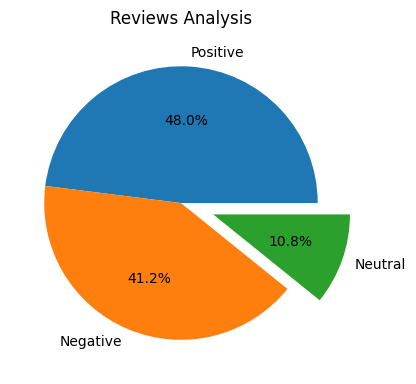

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [ ]:
df.to_csv("BA_reviews.csv")